## An interpretable mortality prediction model for COVID-19 patients

**Data Preprocessing**

**Importing the libraries**

In [2]:
import numpy as np
import pandas as pd

Here we have imported Numpy package inorder to to perform a number of mathematical operations on arrays.
Pandas has two data structures: dataframe and series. Dataframe is commonly used for data manipulation.

**Dataset Description:**

**This study uses a database of blood samples from covid-19 infected patients in the region of Wuhan, China, to identify crucial predictive biomarkers of disease mortality.Here we are using the test set on the latest blood samples of 110 patients.**

**Importing the original dataset**

In [23]:
a0=pd.read_excel("time_series_test_110_preprocess_en.xlsx") #To import the excel file as a dataframe

In [24]:
a0 #Displaying the dataframe

,PATIENT_ID,RE_DATE,Lactate dehydrogenase,Hypersensitive c-reactive protein,(%)lymphocyte,Admission time,Discharge time,outcome
0,1.0,2020-02-10 11:15:00,NaN,NaN,28.0,2020-02-09 10:47:24,2020-02-21 14:51:12,0
1,NaN,2020-02-10 12:07:00,183.0,5.1,NaN,2020-02-09 10:47:24,2020-02-21 14:51:12,0
2,NaN,2020-02-13 09:35:00,NaN,NaN,28.6,2020-02-09 10:47:24,2020-02-21 14:51:12,0
3,NaN,2020-02-13 10:06:00,194.0,2.7,NaN,2020-02-09 10:47:24,2020-02-21 14:51:12,0
4,2.0,2020-02-09 06:56:00,NaN,NaN,28.3,2020-02-09 03:39:47,2020-02-21 11:57:40,0
...,...,...,...,...,...,...,...,...
752,NaN,2020-02-05 12:36:00,562.0,78.1,NaN,2020-02-05 00:27:57,2020-02-22 14:11:47,0
753,NaN,2020-02-11 09:40:00,NaN,NaN,9.7,2020-02-05 00:27:57,2020-02-22 14:11:47,0
754,NaN,2020-02-11 10:04:00,438.0,NaN,NaN,2020-02-05 00:27:57,2020-02-22 14:11:47,0
755,NaN,2020-02-17 10:00:00,430.0,31.2,NaN,2020-02-05 00:27:57,2020-02-22 14:11:47,0


**Checking out the missing values**

In [27]:
a0.isnull().sum() #returns the sum of null values in each column of the dataframe.

PATIENT_ID                           647
RE_DATE                                0
Lactate dehydrogenase                397
Hypersensitive c-reactive protein    472
(%)lymphocyte                        384
Admission time                         0
Discharge time                         0
outcome                                0
dtype: int64

**In the study, the number of key features was set to the following three: lactic dehydrogenase (LDH), lymphocytes and high-sensitivity C-reactive protein (hs-CRP).Therefore the dataset is cleaned to include the three features which was used in the study and to remove the null values.The model outcome corresponds to the mortality of the patients. Patients who survived were put in class 0 and those who died in class 1.**

**Importing the dataset after cleaning**

In [3]:
a=pd.read_excel("Final.xlsx") #To import the excel file as a dataframe

In [4]:
a #Displaying the dataframe

,ID,Lactate dehydrogenase,Hypersensitive c-reactive protein,(%)lymphocyte,outcome
0,1,183,5.1,28.0,0
1,1,194,2.7,28.6,0
2,2,216,5.3,28.3,0
3,2,172,0.7,30.5,0
4,3,366,34.7,3.6,1
...,...,...,...,...,...
255,109,417,228.2,1.0,1
256,109,501,317.6,1.3,1
257,109,403,258.8,0.9,1
258,110,562,78.1,11.0,0


**Checking out the missing values**

In [5]:
a.isnull().any() #isnull().any() is used to check whether there exist any null values in the dataframe.

ID                                   False
Lactate dehydrogenase                False
Hypersensitive c-reactive protein    False
(%)lymphocyte                        False
outcome                              False
dtype: bool

**This study develops a model which helps to predict patients who require urgent medical attention in order to reduce the clinical burden and potentially decreasing the rate of mortality.**

**Therefore the aim of this assignment is to try and implement a similar model as much as possible**

**Preparing feature and target data**

In [6]:
X=a.iloc[:,1:4] #Here we have selected the features of the dataframe 'a' using iloc() and stored it in a variable named X.

**Displaying the feature data**

In [7]:
X #Displaying the data.

,Lactate dehydrogenase,Hypersensitive c-reactive protein,(%)lymphocyte
0,183,5.1,28.0
1,194,2.7,28.6
2,216,5.3,28.3
3,172,0.7,30.5
4,366,34.7,3.6
...,...,...,...
255,417,228.2,1.0
256,501,317.6,1.3
257,403,258.8,0.9
258,562,78.1,11.0


In [8]:
y=a.iloc[:,4] #selecting the target using iloc() and assigning it to the variable y.

**Displaying the target data**

In [9]:
y #Displaying the data.

0      0
1      0
2      0
3      0
4      1
      ..
255    1
256    1
257    1
258    0
259    0
Name: outcome, Length: 260, dtype: int64

**Splitting the data into training and testing set**

Here we import the 'train_test_split' function from the 'model_selection' subpackage of sklearn

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=791)
#Here we assign the data to variables by splitting the original data into training and testing set.
#random_state is the seed used by the random number generator, it can be any integer.

**Development of a machine learning model**

This study uses a supervised XGBoost classifier as the predictor model. XGBoost is a high-performance machine learning algorithm that benefits from great interpretability potential due to its recursive tree-based decision system.

**Installing XGBoost**

XGBoost is used in Applied Machine Learning and is known for its gradient boosting algorithm.

In [27]:
pip install xgboost #Installing XGBoost using 'pip install'.

Note: you may need to restart the kernel to use updated packages.


**XGBoost Classifier with parameters**

XGBoost was originally trained in this study with the following default parameter settings: maximum depth equal to 4, learning rate equal to 0.2, number of tree estimators set to 150, value of the regularization parameter α set to 1 and ‘subsample’ and ‘colsample_bytree’ both set to 0.9. Therefore creating a model with the same parameters as used in the study. 

In [57]:
from xgboost import XGBClassifier
#Here we import the 'XGBClassifier' function from xgboost

In [58]:
model = XGBClassifier(max_depth=4,learning_rate=0.2,n_estimators=150,reg_alpha=1,subsample=0.9,colsample_bytree=0.9)
model.fit(X_train, y_train)
#here we fit the training data using XGBClassifier().

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=1,
              reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
print(model) #printing the model.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=1,
              reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)


**Making predictions for test data**

In [60]:
y_pred = model.predict(X_test) #here the predict() predict the new values for the testing set.
predictions = [round(value) for value in y_pred] #here the round() will return the nearest integer values of y_pred and store it in a variable named predictions.

**Predictions for the training set.**

In [61]:
y_pred2 = model.predict(X_train) #here the predict() predict the new values for the training set.

**Displaying the actual and predicted class**

In [77]:
for i in range(len(y_test)):    #The len() will return an integer value of string,list etc and the for loop is used to change the value of 'i' in the specified range,here it is the length of the variable y_test
    print("Actual class: ",y_test.values[i]," , predicted class :",y_pred[i]) #Printing the actual class and predicted class for each 'i'.

Actual class:  0  , predicted class : 0
Actual class:  1  , predicted class : 1
Actual class:  0  , predicted class : 0
Actual class:  0  , predicted class : 0
Actual class:  1  , predicted class : 1
Actual class:  0  , predicted class : 0
Actual class:  0  , predicted class : 1
Actual class:  0  , predicted class : 0
Actual class:  0  , predicted class : 0
Actual class:  0  , predicted class : 0
Actual class:  0  , predicted class : 0
Actual class:  1  , predicted class : 1
Actual class:  1  , predicted class : 1
Actual class:  0  , predicted class : 0
Actual class:  0  , predicted class : 0
Actual class:  0  , predicted class : 0
Actual class:  1  , predicted class : 1
Actual class:  0  , predicted class : 0
Actual class:  0  , predicted class : 0
Actual class:  0  , predicted class : 0
Actual class:  0  , predicted class : 0
Actual class:  0  , predicted class : 0
Actual class:  0  , predicted class : 0
Actual class:  0  , predicted class : 0
Actual class:  0  , predicted class : 0


**Evaluating perdictions**

**In the study,the performance models were evaluated by assessing the classification accuracy (ratio of true predictions over all predictions), the precision, sensitivity/recall and F1 scores.**

**Calculating the accuracy of the XGBoost Classifier**

Here we import the 'accuracy_score' function from the 'metrics' subpackage of sklearn

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy = accuracy_score(y_test, predictions) 
#In multilabel classification, accuracy_score() function computes subset accuracy.
#Here it is used to compute the accuracy of 'predictions' which is a subset ot the testing data.
print("Accuracy: %.2f%%" % (accuracy * 100.0)) #printing the accuracy to 2 decimal places.The '*' function denotes multiplication.

Accuracy: 95.38%


In [64]:
from sklearn import metrics
#here we import the 'metrics' funtion from the sklearn

In [65]:
a=metrics.accuracy_score(y_test, y_pred)
#In multilabel classification, accuracy_score() function computes subset accuracy.
#Here it is used to compute the accuracy of y_pred which is a subset ot the testing data.

In [66]:
b=metrics.accuracy_score(y_train, y_pred2)
#In multilabel classification, accuracy_score() function computes subset accuracy.
#Here it is used to compute the accuracy of y_pred2 which is a subset ot the training data.

**Plotting a bar graph for displaying accuracies**

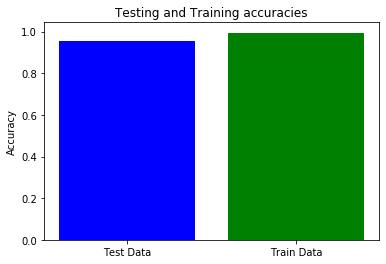

In [67]:
import matplotlib.pyplot as plt #importing the matplotlib.pyplot as 'plt' in short which is a collection of command style functions that make matplotlib work like MATLAB.
#Each pyplot function makes some change to a figure
x='Test Data' #Assigning the string 'Test Data' to the variable x
y='Train Data' #Assigning the string 'Train Data' to the variable y
c=[x,y] #Creating a list using the variables x and y
d=[a,b] #Creating a list which contains the accuracy
plt.bar(c,d,color=['blue','green']) #Plotting a bar graph using the lists 'c' and 'd'
plt.ylabel('Accuracy') # Giving the name 'Accuracy' to the y axis
plt.title('Testing and Training accuracies') #plt.title() is used to add title for the plot.
plt.show() #plt.show() will display the plot.

**Classification report for the XGBoost Algorithm**

Here we import the 'classification_report' function from the 'metrics' subpackage of sklearn

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred)) #printing the classification report

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        51
           1       0.87      0.93      0.90        14

    accuracy                           0.95        65
   macro avg       0.92      0.94      0.93        65
weighted avg       0.96      0.95      0.95        65



**Calculating the AUC for XGBoost Classifier and displaying them**

In [31]:
from sklearn.metrics import roc_auc_score
#Here we import the 'roc_auc_score' function from the 'metrics' subpackage of sklearn
xgb_auc= roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
#roc_auc_score() compute area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
print("XGBoost tree Area Under the Curve = " +str(xgb_auc))

XGBoost tree Area Under the Curve = 0.9915966386554621


An excellent model has AUC near to the 1 which means it has good measure of separability.This model has auc=0.99159

**Calculating and displaying the confusion matrix for XGBoost Classifier**

In [46]:
from sklearn.metrics import confusion_matrix
#Here we import the 'confusion_matrix' function from the 'metrics' subpackage of sklearn
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred)) #Printing the confusion matrix


Confusion Matrix
[[49  2]
 [ 1 13]]


**Plotting the ROC curve for XGBoost Classifier**

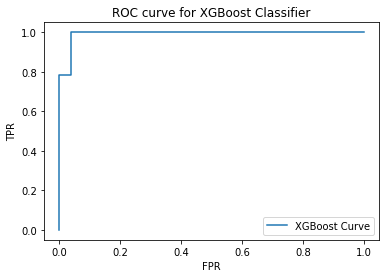

In [48]:
from sklearn.metrics import roc_curve
#Here we import the 'roc_curve' function from the 'metrics' subpackage of sklearn
import numpy as np
fpr, tpr, _ = roc_curve(y_test,model.predict_proba(X_test)[:,1],pos_label=1)
plt.plot(fpr,tpr,label="XGBoost Curve")
plt.xlabel("FPR") #plt.xlabel() is used to give the label for the x axis.
plt.ylabel("TPR") #plt.ylabel() is used to give the label for the y axis.
plt.title('ROC curve for XGBoost Classifier') #plt.title() is used to add title for the plot.
plt.legend(loc=4) #Create a legend for the plot element
plt.show()  #plt.show() will display the plot.

The XGBoost classifier gives a curve closer to the top-left corner which indicate a better performance. 

**Feature importance**

In [82]:
# get importance
importance = model.feature_importances_
#Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.
for i,v in enumerate(importance):   #The enumerate() method adds counter to an iterable and returns it.
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.11170
Feature: 1, Score: 0.25392
Feature: 2, Score: 0.63439


**Plotting the feature importance**

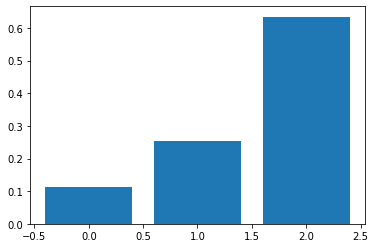

In [87]:
plt.bar([x for x in range(len(importance))], importance) #plt.bar() is used to make a bar plot.
plt.show() #plt.show() will display the plot.

**We can see that the importance of Feature 2, LDH , as a crucial biomarker for patient mortality rate.**

**In the study, for benchmark purposes,the performances of the interpretable model were compared with other standard methods such as random forest and logistic regression**

**Therefore developing models using random forest and logistic regression for comparison purpose**

**Random Forest**

In [69]:
from sklearn.tree import DecisionTreeClassifier
#here we import the 'DecisionTreeClassifier' function from the 'tree' subpackage of sklearn.
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
#here we fit the training data using DecisionTreeClassifier().
y_pred = clf.predict(X_test)
#here the predict() predict the new values for the testing set.

**Calculating the accuracy of this model**

In [70]:
print("Accuracy on test data:",metrics.accuracy_score(y_test, y_pred))
#printing the accuracy of the test data using accuracy_score().
clf.score #uses the mean accuracy.

Accuracy on test data: 0.8923076923076924


<bound method ClassifierMixin.score of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')>

In [71]:
y_pred_2=clf.predict(X_train) 
#here the predict() predict the new values for the training set.
print("Accuracy on training data:",metrics.accuracy_score(y_train, y_pred_2))
#printing the accuracy of the training data using accuracy_score().

Accuracy on training data: 1.0


**Logistic Regression**

In [72]:
from sklearn.linear_model import LogisticRegression
#here we import the 'LogisticRegression' function from the 'linear_model' subpackage of sklearn.
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
#here we fit the training data using LogisticRegression().

C:\Users\benjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
y_pred=log_reg.predict(X_test)
#here the predict() predict the new values for the testing set.

In [74]:
y_pred2=log_reg.predict(X_train)
#here the predict() predict the new values for the training set.

**Calculaitng the accuracy of this model**

In [75]:
print("Accuracy on test data:",metrics.accuracy_score(y_test, y_pred))
#printing the accuracy of the test data using accuracy_score().

Accuracy on test data: 0.9384615384615385


In [76]:
print("Accuracy on training data:",metrics.accuracy_score(y_train, y_pred_2))
#printing the accuracy of the training data using accuracy_score().

Accuracy on training data: 1.0


**Model Evaluation**

The accuracy of machine learning model using random forest is 89.2% and that of the machine learning model using logistic regression is 93.8%. Both of these models are having accuracies less than that of the XGBoost Classifier which has an accuracy of 95.8%.